In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Extracion del archivo a un dataframe

df_hechos=pd.read_excel("homicidios.xlsx",sheet_name="HECHOS")
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
# Limpieza de columna que no se utilizaran para este caso

df_hechos.drop(columns=["FECHA","DD","HH","HORA","LUGAR_DEL_HECHO","TIPO_DE_CALLE","Calle","Altura","Cruce","Dirección Normalizada","COMUNA","XY (CABA)","PARTICIPANTES"], inplace=True) # limpieza de columnas no importantes para este caso
df_hechos

,ID,N_VICTIMAS,AAAA,MM,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016,1,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016,1,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016,1,-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,-58.43353773,-34.64561636,MOTO,AUTO
692,2021-0094,1,2021,12,-58.46739825,-34.65117757,MOTO,AUTO
693,2021-0095,1,2021,12,-58.47293407,-34.61984745,MOTO,CARGAS
694,2021-0096,1,2021,12,-58.47066794,-34.65021673,AUTO,CARGAS


In [4]:
# creacion de nueva columna con la longitud y latitud concatenadas

df_hechos['COORDENADAS'] = df_hechos['pos y'].astype(str) + ", " + df_hechos['pos x']
df_hechos = df_hechos.drop(columns=["pos x", "pos y"])
df_hechos

,ID,N_VICTIMAS,AAAA,MM,VICTIMA,ACUSADO,COORDENADAS
0,2016-0001,1,2016,1,MOTO,AUTO,"-34.68757022, -58.47533969"
1,2016-0002,1,2016,1,AUTO,PASAJEROS,"-34.66977709, -58.50877521"
2,2016-0003,1,2016,1,MOTO,AUTO,"-34.63189362, -58.39040293"
3,2016-0004,1,2016,1,MOTO,SD,"-34.68092974, -58.46503904"
4,2016-0005,1,2016,1,MOTO,PASAJEROS,"-34.62246630, -58.38718297"
...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,MOTO,AUTO,"-34.64561636, -58.43353773"
692,2021-0094,1,2021,12,MOTO,AUTO,"-34.65117757, -58.46739825"
693,2021-0095,1,2021,12,MOTO,CARGAS,"-34.61984745, -58.47293407"
694,2021-0096,1,2021,12,AUTO,CARGAS,"-34.65021673, -58.47066794"


# Analisis de metricas simple de homicidios


### Cantidad de victimas por homicidios

In [5]:
#Creacion de una columna adicional discriminada por el semestre del homicidio

df_hechos['Semestre_del_anio'] = df_hechos['MM'].apply(lambda x: "1" if 1 <= x <= 6 else ("2" if 7 <= x <= 12 else x))

df_hechos['SEMESTRE'] = df_hechos['AAAA'].astype(str) + "_" + df_hechos['Semestre_del_anio']

df_hechos = df_hechos.drop(columns=["MM", "Semestre_del_anio"])

df_hechos

,ID,N_VICTIMAS,AAAA,VICTIMA,ACUSADO,COORDENADAS,SEMESTRE
0,2016-0001,1,2016,MOTO,AUTO,"-34.68757022, -58.47533969",2016_1
1,2016-0002,1,2016,AUTO,PASAJEROS,"-34.66977709, -58.50877521",2016_1
2,2016-0003,1,2016,MOTO,AUTO,"-34.63189362, -58.39040293",2016_1
3,2016-0004,1,2016,MOTO,SD,"-34.68092974, -58.46503904",2016_1
4,2016-0005,1,2016,MOTO,PASAJEROS,"-34.62246630, -58.38718297",2016_1
...,...,...,...,...,...,...,...
691,2021-0093,1,2021,MOTO,AUTO,"-34.64561636, -58.43353773",2021_2
692,2021-0094,1,2021,MOTO,AUTO,"-34.65117757, -58.46739825",2021_2
693,2021-0095,1,2021,MOTO,CARGAS,"-34.61984745, -58.47293407",2021_2
694,2021-0096,1,2021,AUTO,CARGAS,"-34.65021673, -58.47066794",2021_2


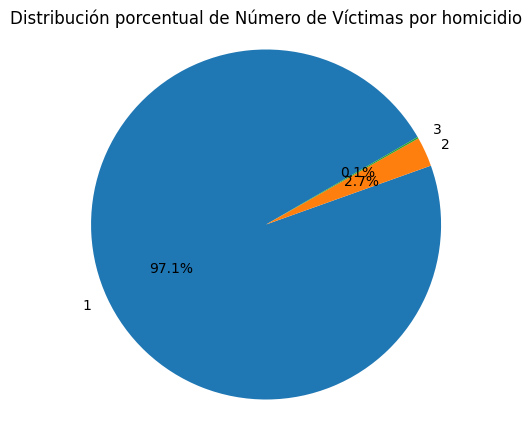

In [6]:
# Crear un gráfico de tarta
plt.figure(figsize=(6, 5))  # Ajusta el tamaño del gráfico si es necesario
plt.pie(df_hechos["N_VICTIMAS"].value_counts(), labels=df_hechos["N_VICTIMAS"].value_counts().index, autopct='%1.1f%%', startangle=30)
plt.title("Distribución porcentual de Número de Víctimas por homicidio")
plt.axis('equal')  # Hace que el gráfico sea circular

# Mostrar el gráfico
plt.show()

### Distribucion de tipo de hecho por tipo de victima

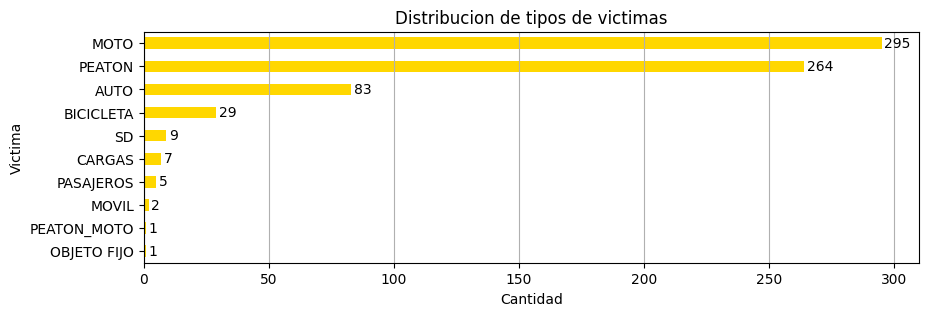

In [7]:
# Contar la frecuencia de cada valor único en la columna
conteo_valores = df_hechos["VICTIMA"].value_counts()
conteo_valores = conteo_valores.sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 3))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='gold')
plt.title("Distribucion de tipos de victimas")
plt.xlabel("Cantidad")
plt.ylabel("Victima")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='-')

# Mostrar el gráfico
plt.show()

### Distribucion de tipo de hecho por tipo de acusado

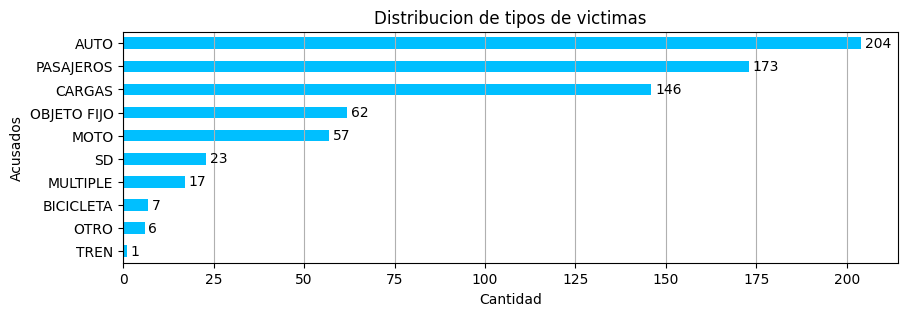

In [8]:

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = df_hechos["ACUSADO"].value_counts().sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 3))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='deepskyblue')
plt.title("Distribucion de tipos de victimas")
plt.xlabel("Cantidad")
plt.ylabel("Acusados")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='-')

# Mostrar el gráfico
plt.show()

### Distribucion de hechos por anio

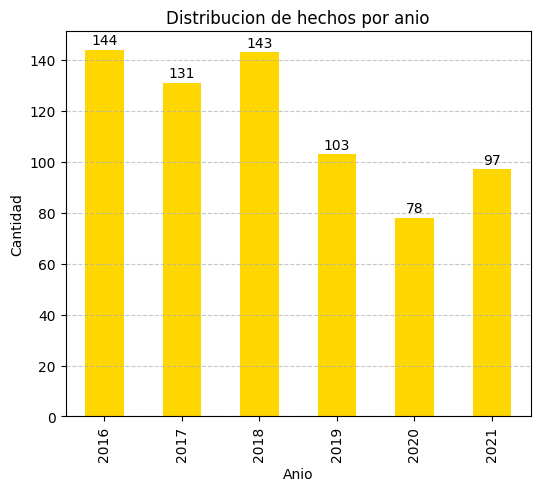

In [9]:

conteo_valores = df_hechos["AAAA"].value_counts().sort_index(ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(6, 5))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='gold')
plt.title("Distribucion de hechos por anio")
plt.xlabel("Anio")
plt.ylabel("Cantidad")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

### Distribucion de hechos por semestres

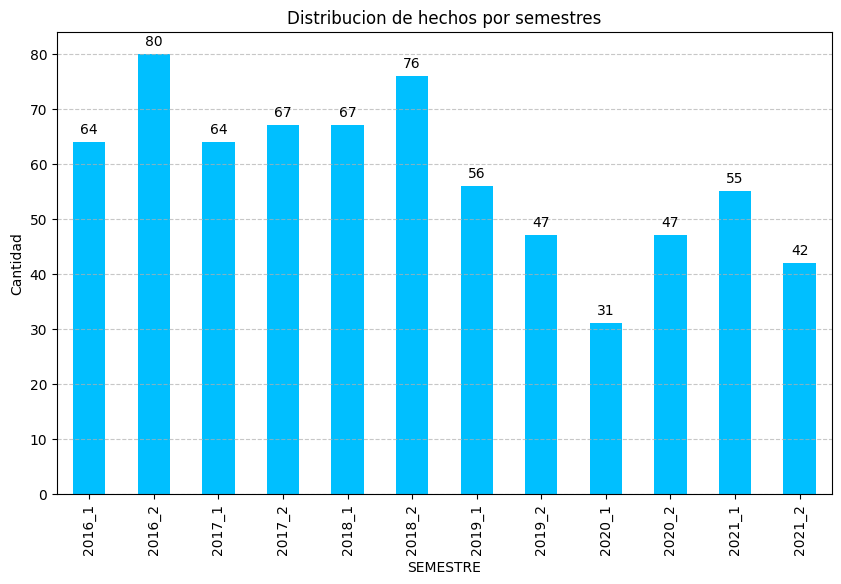

In [10]:
# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = df_hechos["SEMESTRE"].value_counts().sort_index(ascending=True)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='deepskyblue')
plt.title("Distribucion de hechos por semestres")
plt.xlabel("SEMESTRE")
plt.ylabel("Cantidad")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# KPI 01 

#### Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

#### Se debe importar un dataset que contenga la población anual por comuna extraído de la página oficial del gobierno https://www.estadisticaciudad.gob.ar/eyc/?p=28146

In [12]:
df_total = pd.read_excel("poblacion-10-to-25.xls", sheet_name=0, header=2)
df_total.head(5)

,Comuna,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Total,3028481.0,3033639.0,3038860.0,3044076.0,3049229.0,3054267.0,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0,3081550.0,3083770.0,3085483.0,3086680
1,1,243946.0,245308.0,246689.0,248069.0,249433.0,250770.0,252053.0,253271.0,254408.0,255457.0,256405.0,257235.0,257934.0,258497.0,258922.0,259205
2,2,150714.0,150573.0,150428.0,150278.0,150130.0,149985.0,149848.0,149720.0,149607.0,149510.0,149430.0,149371.0,149337.0,149328.0,149345.0,149389
3,3,191323.0,191536.0,191750.0,191963.0,192171.0,192375.0,192573.0,192763.0,192945.0,193115.0,193276.0,193425.0,193560.0,193682.0,193790.0,193884
4,4,234933.0,235497.0,236071.0,236646.0,237214.0,237769.0,238303.0,238809.0,239279.0,239712.0,240100.0,240437.0,240716.0,240937.0,241096.0,241193


In [13]:
# Eliminar filas a partir del índice 16 (incluyendo el índice 16)
indice_inicio = 1
df_poblacion = df_total.drop(df_total.index[indice_inicio:])

# Eliminar columna "Comuna"
df_poblacion = df_poblacion.drop(columns="Comuna")

# Eliminar columnas irrelevantes
columnas_a_eliminar = [2010, 2011, 2012, 2013, 2014, 2022, 2023, 2024, 2025]
df_poblacion = df_poblacion.drop(columns=columnas_a_eliminar)

df_poblacion = df_poblacion.T.reset_index()

# Renombrar las columnas
df_poblacion.rename(columns={'index': 'AAAA',
                         0: 'POBLACION_ANUAL'}, inplace=True)

df_poblacion["AAAA"] = df_poblacion["AAAA"].astype(str)
df_poblacion

,AAAA,POBLACION_ANUAL
0,2015,3054267.0
1,2016,3059122.0
2,2017,3063728.0
3,2018,3068043.0
4,2019,3072029.0
5,2020,3075646.0
6,2021,3078836.0


In [14]:
# crear df con valores concatenados de todos los años y semestres necesarios
# Crear un rango de años desde 2015 hasta 2021
rango_anios = list(range(2015, 2022))

# Crear un DataFrame con los años y los semestres (1 y 2)
df_semestres = pd.DataFrame({'AAAA': [str(anio) for anio in rango_anios for _ in range(2)],
                   'SEM': ["1", "2"] * len(rango_anios)})

# agregar nueva columna
df_semestres["SEMESTRE"] = df_semestres["AAAA"] + "_" + df_semestres["SEM"]
df_semestres = df_semestres.drop(columns="SEM")

df_semestres

,AAAA,SEMESTRE
0,2015,2015_1
1,2015,2015_2
2,2016,2016_1
3,2016,2016_2
4,2017,2017_1
5,2017,2017_2
6,2018,2018_1
7,2018,2018_2
8,2019,2019_1
9,2019,2019_2


In [15]:
# unir df poblacion y df semestres
df_poblacion = pd.merge(df_poblacion, df_semestres, on="AAAA", how="left")

# Reordenar las columnas en el orden deseado
column_order = ['SEMESTRE', 'POBLACION_ANUAL']
df_poblacion = df_poblacion[column_order]

df_poblacion

,SEMESTRE,POBLACION_ANUAL
0,2015_1,3054267.0
1,2015_2,3054267.0
2,2016_1,3059122.0
3,2016_2,3059122.0
4,2017_1,3063728.0
5,2017_2,3063728.0
6,2018_1,3068043.0
7,2018_2,3068043.0
8,2019_1,3072029.0
9,2019_2,3072029.0


FORMULA 1: (porcentaje de variación): {[[(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000] - [(Número de homicidios en siniestros viales del semestre actual / Población total del semestre actual) * 100,000]] / [(Número de homicidios en siniestros viales del semestre anterior / Población total del semestre anterior) * 100,000]} * 100.

In [16]:
df_actual = df_hechos.groupby("SEMESTRE")["N_VICTIMAS"].sum().reset_index()
df_actual = pd.merge(df_actual, df_poblacion, on="SEMESTRE", how="left")
df_actual = df_actual.rename(columns={"N_VICTIMAS": "N_VICTIMAS_SEMESTRE",
                                      "SEMESTRE": "SEMESTRE",
                                      "POBLACION_ANUAL": "POBLACION_ANUAL"})
df_actual

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL
0,2016_1,65,3059122.0
1,2016_2,81,3059122.0
2,2017_1,69,3063728.0
3,2017_2,71,3063728.0
4,2018_1,70,3068043.0
5,2018_2,79,3068043.0
6,2019_1,57,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,50,3075646.0


In [17]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(SEMESTRE: str):
    '''
    Asignar semestre anterior de acuerdo a una lista de semestres preestablecida.
    Recibe como parámetro un semestre en formato str de la forma AAAA_SEMESTRE
    '''
    posicion = lista_semestres.index(SEMESTRE)
    return lista_semestres[posicion - 1]

df_actual['SEMESTRE_ANTERIOR'] = df_actual['SEMESTRE'].apply(asignar_semestre_anterior)

df_actual

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR
0,2016_1,65,3059122.0,2015_2
1,2016_2,81,3059122.0,2016_1
2,2017_1,69,3063728.0,2016_2
3,2017_2,71,3063728.0,2017_1
4,2018_1,70,3068043.0,2017_2
5,2018_2,79,3068043.0,2018_1
6,2019_1,57,3072029.0,2018_2
7,2019_2,47,3072029.0,2019_1
8,2020_1,31,3075646.0,2019_2
9,2020_2,50,3075646.0,2020_1


In [18]:
# crear nuevo df para obtener valores anteriores
df_anterior = df_hechos.groupby("SEMESTRE")["N_VICTIMAS"].sum().reset_index()
df_anterior = pd.merge(df_anterior, df_poblacion, on="SEMESTRE", how="left")
df_anterior = df_anterior.rename(columns={"N_VICTIMAS": "N_VICTIMAS_SEMESTRE_ANTERIOR",
                                          "SEMESTRE": "SEMESTRE_ANTERIOR",
                                          "POBLACION_ANUAL": "POBLACION_ANUAL_ANTERIOR"})
df_anterior

,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR
0,2016_1,65,3059122.0
1,2016_2,81,3059122.0
2,2017_1,69,3063728.0
3,2017_2,71,3063728.0
4,2018_1,70,3068043.0
5,2018_2,79,3068043.0
6,2019_1,57,3072029.0
7,2019_2,47,3072029.0
8,2020_1,31,3075646.0
9,2020_2,50,3075646.0


In [19]:
# unir df actual y df anterior

df_kpi_1 = pd.merge(df_actual, df_anterior, on="SEMESTRE_ANTERIOR", how="left")
df_kpi_1

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR
0,2016_1,65,3059122.0,2015_2,NaN,NaN
1,2016_2,81,3059122.0,2016_1,65.0,3059122.0
2,2017_1,69,3063728.0,2016_2,81.0,3059122.0
3,2017_2,71,3063728.0,2017_1,69.0,3063728.0
4,2018_1,70,3068043.0,2017_2,71.0,3063728.0
5,2018_2,79,3068043.0,2018_1,70.0,3068043.0
6,2019_1,57,3072029.0,2018_2,79.0,3068043.0
7,2019_2,47,3072029.0,2019_1,57.0,3072029.0
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0
9,2020_2,50,3075646.0,2020_1,31.0,3075646.0


In [20]:
tasa_anterior = (df_kpi_1["N_VICTIMAS_SEMESTRE_ANTERIOR"] / df_kpi_1["POBLACION_ANUAL_ANTERIOR"]) * 100000
tasa_actual = (df_kpi_1["N_VICTIMAS_SEMESTRE"] / df_kpi_1["POBLACION_ANUAL"]) * 100000

df_kpi_1["KPI_1"] = (((tasa_anterior - tasa_actual) / tasa_anterior) * 100).round(2)
df_kpi_1

,SEMESTRE,N_VICTIMAS_SEMESTRE,POBLACION_ANUAL,SEMESTRE_ANTERIOR,N_VICTIMAS_SEMESTRE_ANTERIOR,POBLACION_ANUAL_ANTERIOR,KPI_1
0,2016_1,65,3059122.0,2015_2,NaN,NaN,NaN
1,2016_2,81,3059122.0,2016_1,65.0,3059122.0,-24.62
2,2017_1,69,3063728.0,2016_2,81.0,3059122.0,14.94
3,2017_2,71,3063728.0,2017_1,69.0,3063728.0,-2.90
4,2018_1,70,3068043.0,2017_2,71.0,3063728.0,1.55
5,2018_2,79,3068043.0,2018_1,70.0,3068043.0,-12.86
6,2019_1,57,3072029.0,2018_2,79.0,3068043.0,27.94
7,2019_2,47,3072029.0,2019_1,57.0,3072029.0,17.54
8,2020_1,31,3075646.0,2019_2,47.0,3072029.0,34.12
9,2020_2,50,3075646.0,2020_1,31.0,3075646.0,-61.29


posx and posy should be finite values
posx and posy should be finite values


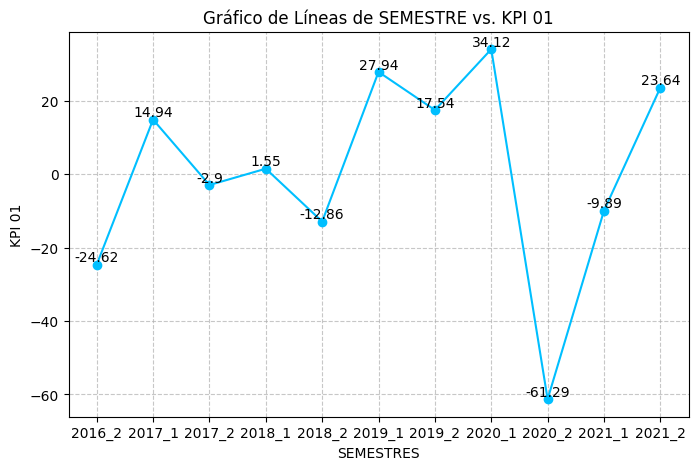

In [21]:
semestre = df_kpi_1["SEMESTRE"]
kpi = df_kpi_1["KPI_1"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 5))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-',color = "deepskyblue")
plt.title('Gráfico de Líneas de SEMESTRE vs. KPI 01')
plt.xlabel('SEMESTRES')
plt.ylabel('KPI 01')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Conclusiones:

1- Dado que no tenemos datos previos al año 2016-1 nuestra primer medida relaciona el semestre 2016-1 y 2016-2 por eso solo se evidencian valores a partir del semestre 2016-2.

2- Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos homicidios que el semestre pasado.

3- Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el semestre anterior aumentó de manera positiva.

4- El valor que se representa en la gráfica indica el porcentaje en que se redujo la tasa de homicidios en accidentes de tránsito del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 10% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

-- 2017-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

-- 2019-1: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

-- 2019-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue menor que el logrado el semestre anterior.

-- 2021-2: En comparación con el semestre anterior se redujeron los homicidios y ese numero fue mayor que el logrado el semestre anterior.

5- 4 semestres de 11 cumplieron el objetivo lo cual nos indica que no es positivo el balance de acuerdo a lo planteado inicialmente

6- 5 semestres de 11 tienen un porcentaje de cambio negativo, es decir, aumenta la tasa de homicidios vs. el semestre anterior. Aunque es minoría sigue siendo alarmante la cantidad

# KPI 02

#### Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [22]:
# filtrar df para consultas del kpi

filtro = "MOTO"
df_filtro = df_hechos[df_hechos["VICTIMA"] == filtro]
df_filtro.head(3)

,ID,N_VICTIMAS,AAAA,VICTIMA,ACUSADO,COORDENADAS,SEMESTRE
0,2016-0001,1,2016,MOTO,AUTO,"-34.68757022, -58.47533969",2016_1
2,2016-0003,1,2016,MOTO,AUTO,"-34.63189362, -58.39040293",2016_1
3,2016-0004,1,2016,MOTO,SD,"-34.68092974, -58.46503904",2016_1


In [23]:
# crear nuevo df para obtener valores actuales

df_actual = df_filtro.groupby("AAAA")["VICTIMA"].count().reset_index()
df_actual = df_actual.rename(columns={"VICTIMA": "ACCIDENTES"})
df_actual["VICTIMA"] = filtro
df_actual = df_actual[["VICTIMA", "AAAA", "ACCIDENTES"]]

df_actual['AAAA_ANTERIOR'] = df_actual['AAAA']-1
df_actual

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR
0,MOTO,2016,64,2015
1,MOTO,2017,53,2016
2,MOTO,2018,55,2017
3,MOTO,2019,50,2018
4,MOTO,2020,27,2019
5,MOTO,2021,46,2020


In [24]:
# crear nuevo df para obtener valores anteriores

df_anterior = df_filtro.groupby("AAAA")["VICTIMA"].count().reset_index()
df_anterior = df_anterior.rename(columns={"VICTIMA": "ACCIDENTES_ANTERIOR",
                                          "AAAA": "AAAA_ANTERIOR"})
df_anterior

,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,27
5,2021,46


In [25]:
# unir df actual y df anterior

df_kpi_2 = pd.merge(df_actual, df_anterior, on="AAAA_ANTERIOR", how="left")
df_kpi_2

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR
0,MOTO,2016,64,2015,NaN
1,MOTO,2017,53,2016,64.0
2,MOTO,2018,55,2017,53.0
3,MOTO,2019,50,2018,55.0
4,MOTO,2020,27,2019,50.0
5,MOTO,2021,46,2020,27.0


In [26]:
anterior = df_kpi_2["ACCIDENTES_ANTERIOR"]
actual = df_kpi_2["ACCIDENTES"]

df_kpi_2["KPI_2"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_2

,VICTIMA,AAAA,ACCIDENTES,AAAA_ANTERIOR,ACCIDENTES_ANTERIOR,KPI_2
0,MOTO,2016,64,2015,NaN,NaN
1,MOTO,2017,53,2016,64.0,17.19
2,MOTO,2018,55,2017,53.0,-3.77
3,MOTO,2019,50,2018,55.0,9.09
4,MOTO,2020,27,2019,50.0,46.00
5,MOTO,2021,46,2020,27.0,-70.37


posx and posy should be finite values
posx and posy should be finite values


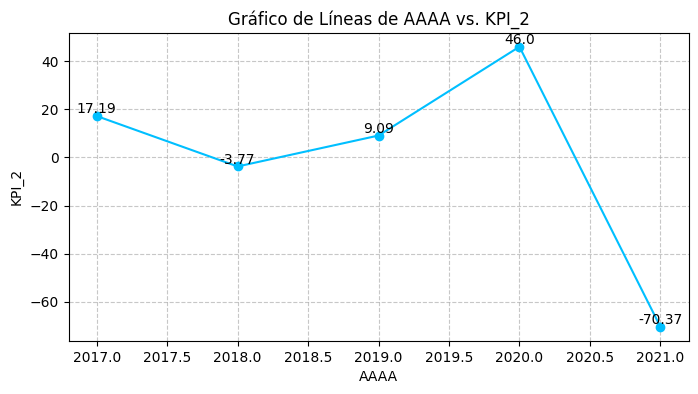

In [27]:
semestre = df_kpi_2["AAAA"]
kpi = df_kpi_2["KPI_2"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-', color="deepskyblue")
plt.title('Gráfico de Líneas de AAAA vs. KPI_2')
plt.xlabel('AAAA')
plt.ylabel('KPI_2')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Conclusiones:

1- Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el año 2016 y 2017 por eso solo se evidencian valores a partir del año 2017.

2- Si el valor del año en la gráfica es positivo significa que para ese año hubo menos homicidios que el año pasado.

3- Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes de motos vs. el año anterior aumentó de manera positiva.

4- El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de homicidios en accidentes de motos del año anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 7% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

-- 2017: En comparación con el año anterior se redujeron los homicidios y dado que no tenemos valores para el año anterior no podemos decir si fue mayor o menor respecto de ese año.

-- 2019: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

-- 2020: En comparación con el año anterior se redujeron los homicidios y ese numero fue mayor que el logrado el año anterior.

5- 3 años de 5 cumplieron el objetivo lo cual nos indica que es positivo el balance de acuerdo a lo planteado inicialmente

6- 2 años de 5 tienen un porcentaje de cambio negativo, es decir, aumenta la tasa de accidentes en moto vs. el año anterior. Aunque es minoría sigue siendo alarmante la cantidad

# KPI 03

Reducir en un 5% el número de accidentes mortales en el ultimo semestre en CABA, ocasionados por el mayor responsable de siniestros viales del ultimo semestre, respecto al mismo responsable en el semestre anterior.

In [28]:
# encontrar el ultimo semestre
lista_filtro_1 = df_hechos["SEMESTRE"].unique().tolist()
filtro_1 = sorted(lista_filtro_1, reverse=True)[0]

filtro_1

'2021_2'

In [29]:
# filtrar por el ultimo semestre
df_filtro_1 = df_hechos[df_hechos["SEMESTRE"] == filtro_1]

# encontrar el mayor responsable de accidentes despues de filtrar el último semestre
df_filtro_2 = df_filtro_1["ACUSADO"].value_counts().sort_values(ascending=False).reset_index()
filtro_2 = df_filtro.loc[0,"ACUSADO"]

filtro_2

'AUTO'

In [30]:
# filtrar df para consultas del kpi
df_filtro = df_hechos[df_hechos["ACUSADO"] == filtro_2]
df_filtro.head(3)

,ID,N_VICTIMAS,AAAA,VICTIMA,ACUSADO,COORDENADAS,SEMESTRE
0,2016-0001,1,2016,MOTO,AUTO,"-34.68757022, -58.47533969",2016_1
2,2016-0003,1,2016,MOTO,AUTO,"-34.63189362, -58.39040293",2016_1
6,2016-0009,1,2016,MOTO,AUTO,"-34.60825440, -58.50095869",2016_1


In [31]:
# crear nuevo df para obtener valores actuales

df_actual = df_filtro.groupby("SEMESTRE")["ACUSADO"].count().reset_index()
df_actual = df_actual.rename(columns={"ACUSADO": "ACCIDENTES"})
df_actual["ACUSADO"] = filtro_2
df_actual = df_actual[["ACUSADO", "SEMESTRE", "ACCIDENTES"]]
df_actual

,ACUSADO,SEMESTRE,ACCIDENTES
0,AUTO,2016_1,18
1,AUTO,2016_2,21
2,AUTO,2017_1,21
3,AUTO,2017_2,18
4,AUTO,2018_1,18
5,AUTO,2018_2,19
6,AUTO,2019_1,22
7,AUTO,2019_2,11
8,AUTO,2020_1,8
9,AUTO,2020_2,17


In [32]:
# agregar semestre anterior como llave de union

# Crear un rango de años desde 2015 hasta 2021
lista_semestres = []

# Crear lista de semestres
for anio in range (2015, 2022):
    for sem in range (1,3):
        semestre = str(anio) + "_" + str(sem)
        lista_semestres.append(semestre)

# funcion para validar el semestre anterior de cada registro
def asignar_semestre_anterior(SEMESTRE: str):
    '''
    Asignar semestre anterior de acuerdo a una lista de semestres preestablecida.
    Recibe como parámetro un semestre en formato str de la forma AAAA_SEMESTRE
    '''
    posicion = lista_semestres.index(SEMESTRE)
    return lista_semestres[posicion - 1]

df_actual['SEMESTRE_ANTERIOR'] = df_actual['SEMESTRE'].apply(asignar_semestre_anterior)

df_actual

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR
0,AUTO,2016_1,18,2015_2
1,AUTO,2016_2,21,2016_1
2,AUTO,2017_1,21,2016_2
3,AUTO,2017_2,18,2017_1
4,AUTO,2018_1,18,2017_2
5,AUTO,2018_2,19,2018_1
6,AUTO,2019_1,22,2018_2
7,AUTO,2019_2,11,2019_1
8,AUTO,2020_1,8,2019_2
9,AUTO,2020_2,17,2020_1


In [33]:
# crear nuevo df para obtener valores anteriores

df_anterior = df_filtro.groupby("SEMESTRE")["ACUSADO"].count().reset_index()
df_anterior = df_anterior.rename(columns={"ACUSADO": "ACCIDENTES_ANTERIOR",
                                          "SEMESTRE": "SEMESTRE_ANTERIOR"})
df_anterior

,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR
0,2016_1,18
1,2016_2,21
2,2017_1,21
3,2017_2,18
4,2018_1,18
5,2018_2,19
6,2019_1,22
7,2019_2,11
8,2020_1,8
9,2020_2,17


In [34]:
# unir df actual y df anterior

df_kpi_3 = pd.merge(df_actual, df_anterior, on="SEMESTRE_ANTERIOR", how="left")
df_kpi_3

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR
0,AUTO,2016_1,18,2015_2,NaN
1,AUTO,2016_2,21,2016_1,18.0
2,AUTO,2017_1,21,2016_2,21.0
3,AUTO,2017_2,18,2017_1,21.0
4,AUTO,2018_1,18,2017_2,18.0
5,AUTO,2018_2,19,2018_1,18.0
6,AUTO,2019_1,22,2018_2,19.0
7,AUTO,2019_2,11,2019_1,22.0
8,AUTO,2020_1,8,2019_2,11.0
9,AUTO,2020_2,17,2020_1,8.0


In [35]:
anterior = df_kpi_3["ACCIDENTES_ANTERIOR"]
actual = df_kpi_3["ACCIDENTES"]

df_kpi_3["KPI_3"] = (((anterior - actual) / anterior) * 100).round(2)
df_kpi_3

,ACUSADO,SEMESTRE,ACCIDENTES,SEMESTRE_ANTERIOR,ACCIDENTES_ANTERIOR,KPI_3
0,AUTO,2016_1,18,2015_2,NaN,NaN
1,AUTO,2016_2,21,2016_1,18.0,-16.67
2,AUTO,2017_1,21,2016_2,21.0,0.00
3,AUTO,2017_2,18,2017_1,21.0,14.29
4,AUTO,2018_1,18,2017_2,18.0,0.00
5,AUTO,2018_2,19,2018_1,18.0,-5.56
6,AUTO,2019_1,22,2018_2,19.0,-15.79
7,AUTO,2019_2,11,2019_1,22.0,50.00
8,AUTO,2020_1,8,2019_2,11.0,27.27
9,AUTO,2020_2,17,2020_1,8.0,-112.50


posx and posy should be finite values
posx and posy should be finite values


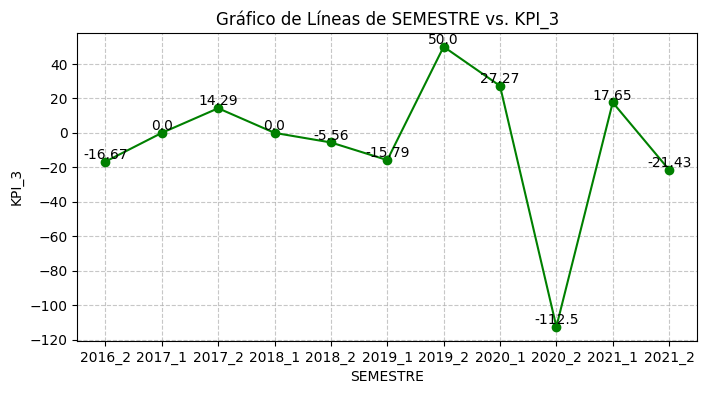

In [36]:
semestre = df_kpi_3["SEMESTRE"]
kpi = df_kpi_3["KPI_3"]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, kpi, marker='o', linestyle='-', color="green")
plt.title('Gráfico de Líneas de SEMESTRE vs. KPI_3')
plt.xlabel('SEMESTRE')
plt.ylabel('KPI_3')

# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(kpi):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Conclusiones:

1- El mayor responsable de accidentes de tránsito del último semestre (2021-2) es el auto por está razón de realiza todo el análisis para este acusado.

2- Dado que no tenemos datos previos al año 2016 nuestra primer medida relaciona el semestre 2016_1 y 2016_2 por eso solo se evidencian valores a partir del semestre 2016_2.

3- Si el valor del semestre en la gráfica es positivo significa que para ese semestre hubo menos accidentes ocasionados por autos que el semestre pasado.

4- Si la gráfica tiene pendiente positiva (creciente) significa que la diferencia de accidentes ocasionados por autos vs. el semestre anterior aumentó de manera positiva.

5- El valor que se representa en la gráfica indica el porcentaje en que se redujo la cantidad de accidentes causados por autos del semestre anterior vs. el actual. Dado que el objetivo es que dicho valor sea superior al 5% se puede concluir que en el periodo de 6 años comprendido entre 2016 y 2021 se cumplió para los semestres:

-- 2017_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado..

-- 2019_2: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

-- 2020_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es menor que la del semestre pasado.

-- 2021_1: Se reducen los accidentes causados por autos vs. el semestre anterior. Dicha diferencia es mayor que la del semestre pasado.

6- 4 semestres de 11 cumplieron el objetivo lo cual nos indica que no es positivo el balance de acuerdo a lo planteado inicialmente

7- 5 semestres de 11 tienen un porcentaje de cambio negativo, es decir, aumentan los accidentes ocasionados vs. el semestre anterior. Aunque es minoría sigue siendo alarmante la cantidad

In [37]:
# Exportar df_hechos y los df de los KPI's a archivos CSV
df_hechos.to_csv('hechos.csv', index=False)
df_kpi_1.to_csv('kpi1.csv', index=False)
df_kpi_2.to_csv('kpi2.csv', index=False)
df_kpi_3.to_csv('kpi3.csv', index=False)